## 노트북 : 23pca

## 주성분분석 Principal component Analysis

#### 둘 이상의 양적변수등 사이에서 분산/ 공분산 관계를 이용하여

  * 예를 들어 8x8 크기의 손글씨 데이터 경우 총 64개의 특성으로 구성되어 있는데
  * 글씨가 쓰여진 영역만 따로 골라서 분석에 활용한다면
  * 64개의 특성이 모두 다 필요한 것은 아님
  * 차원축소 방법 - 투영/사영projection
     + 먼저, 데이터에 임의의 초평면을 정의한 다음
#### PCA를 이용해 고차원의 데이터를 정보손실없이 변환함으로써 시각화가 편리해지고
     * 데이터의 크기가 감소함으로써 빠른 학습이 가능해짐.

* PCA 분석을 위해 공분산/고유벡터/고유값에 대한 개념 필요 - 선형대수

## 주성분 분석 순서
* 먼저 데이터를 표준화/정규화한 후
* 각 변수간 공분산을 구함 
* 공분산을 이용해서 고유값/고유벡터를 구함
* 분산이 큰 고유벡터를 찾아 데이터를 이것에 투영해서
* 그 결과값들을 분석이나 시각화에 사용

### iris 데이터셋을 이용해서 주성분 분석 실시.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# 데이터 적재! 
iris = load_iris()
data = iris.data
target = iris.target

In [5]:
# 전처리
data = StandardScaler().fit_transform(data)

## 공분산 계산
 * 각 독립변수(특성)별 상관관계 파악
 * 그러기 위해서는 특성들을 전치행렬로 변환해야 함
 * 전치행렬은 객체명.T로 간단히 만들 수 있음.
 * 전치행렬은, 선형대수학에서, 전치 행렬은 행과 열을 교환하여 얻는 행렬이다. 
    즉, 주대각선을 축으로 하는 반사 대칭을 가하여 얻는 행렬이다.
     + cov_matrix = np.cov(data.T)

In [6]:
cov_matrix = np.cov(data.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [7]:
## 공분산의 고유값/고유벡터 계산
# * numpy에서 linalg.eig 함수 제공
eigval, eigvec = np.linalg.eig(cov_matrix)
eigval, eigvec

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

### 값이 얼마나 나오는지 확인해보자.

In [8]:
# 데이터의 차원을 1차원으로 변환했을때 73%
# 2차원으로 변환하는 경우 73+23% 정도로 
# 고유데이터의 분산을 유지할 수 있음.

eigval/sum(eigval) # sum으로 나눠서 벡터를 찍어봅니다.

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

### 각 차원별로, 고유값하고 고유값 벡터가 나왔는데 어떻게 파악하는건지 다음에 보고.

### [0,729624] 전체 데이터의 72퍼, 0.228508, 22퍼. 더하면 95퍼센트 정도로 

### 고유데이터의 분산값을 확인할 수 있다는 겁니다.

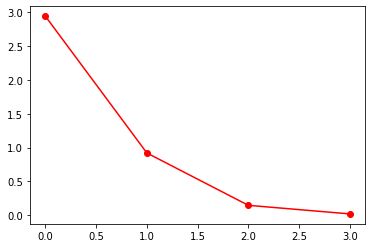

In [9]:
## 고유값을 이용해서 적절한 주성분 갯수 선택
# * 스크리scree 그래프를 이용

plt.plot(eigval, 'ro-')

## 투영한 결과를 데이터프레임에 생성
## 즉, 4차원 데이터를 고유벡터로 투영함
## A벡터를 B벡터에 투영했을 때 투영된 벡터의 길이를 구하는 공식
## => x.y / || y ||
## x.y => np.dot(x,y) , -> x.dot(y) 이렇게 쓰는 것이 낫다.
## || y | => np.linalg.norm(y)

In [10]:
projX1 = data.dot(eigvec.T[0]) / np.linalg.norm(eigvec.T[0])
result = pd.DataFrame(projX1, columns=['PC1'])

projX2 = data.dot(eigvec.T[1]) / np.linalg.norm(eigvec.T[1])
result['PC2'] = projX2

# Target 변수도 넣어야겠지? iris에 Target 변수도 넣어봅니다.

result['target'] = target

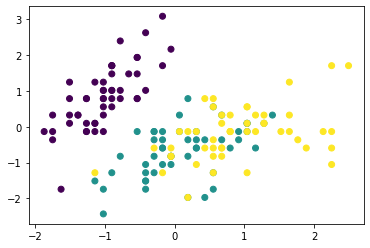

In [11]:
# 다 됬으면 시각화 한번 해봅시다, 기존 변수로 시각화
plt.scatter(data[:, 0], data[:, 1], c=target) # sepal

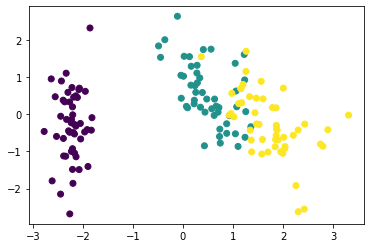

In [12]:
# 주성분 분석 후 시각화
plt.scatter(result.PC1, result.PC2,c=target) 

### 이 두개를 비교하면 모양은 분리가 되는데, 다시 그리더라도 요 내용들이 그대로 나갈겁니다.
### 전체적인 그림을 볼 때는 시각화하기 딱 좋은게 2차원이다. 일단 2차원으로 최소화시켜서 나타낼 수 있다는 거다.
### 대부분 이렇게 가능하단 얘기입니다. 싸이킷런에서 제공하는 함수를 사용하면 간단하게 구현이 됩니다.

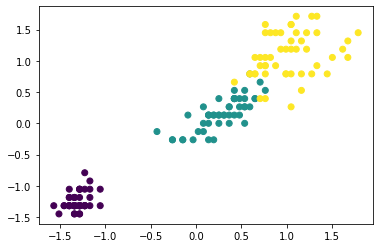

In [13]:
# 기존 변수로 시각화
plt.scatter(data[:, 2], data[:, 3], c=target) # petal

### sepal이든 petal length이든 보라색은 잘 분리가 되지만, 노란색하고 청록색은 분류가 잘 안됩니다.
### 4차원 데이터를 2차원으로 줄이더라도, 기존 특성은 잘 보존되지만 분리되지 않는 것은 잘 안된다.

## 이제 sklearn으로 PCA 분석.

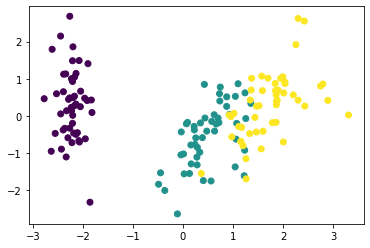

In [14]:
# PCA(n_component) 주성분 갯수 지정 : 차원 축소할 차원 수 지정
pca = PCA(n_components=2)
pcaXY = pca.fit_transform(data)
result = pd.DataFrame(pcaXY, columns=['PC1', 'PC2'])
result['target'] = target

plt.scatter(result.PC1, result.PC2, c = result.target)

## 89구역 54개의 공원 잔디 식물종 분석
* 1~54컬럼만 추출해서 주성분분석 실시
* plot : 실험조건
* species : 식물종
* hay : 건초량
* pH : 토양산성도

In [15]:
pg = pd.read_csv('pgfull.txt')
pg.head()

,AC\tAE\tAM\tAO\tAP\tAR\tAS\tAU\tBH\tBM\tCC\tCF\tCM\tCN\tCX\tCY\tDC\tDG\tER\tFM\tFP\tFR\tGV\tHI\tHL\tHP\tHS\tHR\tKA\tLA\tLC\tLH\tLM\tLO\tLP\tOR\tPL\tPP\tPS\tPT\tQR\tRA\tRB\tRC\tSG\tSM\tSO\tTF\tTG\tTO\tTP\tTR\tVC\tVK\tplot\tlime\tspecies\thay\tpH
0,2.51\t1.18\t0.45\t0.91\t0.47\t0\t0\t0\t0\t0.06...
1,6.85\t0.1\t0.58\t1.02\t0.35\t0\t0\t0\t0\t0.36\...
2,10.58\t0.11\t0.21\t1.85\t0\t0\t0\t0\t0\t0\t0\t...
3,13.65\t0\t0\t6.46\t0\t0\t0\t0\t0\t0\t0\t0\t0\t...
4,4.84\t0\t1.49\t0.36\t0.1\t0.06\t0\t0.02\t0\t0....


In [16]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                      --------------  ----- 
 0   AC	AE	AM	AO	AP	AR	AS	AU	BH	BM	CC	CF	CM	CN	CX	CY	DC	DG	ER	FM	FP	FR	GV	HI	HL	HP	HS	HR	KA	LA	LC	LH	LM	LO	LP	OR	PL	PP	PS	PT	QR	RA	RB	RC	SG	SM	SO	TF	TG	TO	TP	TR	VC	VK	plot	lime	species	hay	pH  89 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


<img src='pca.gif'>

### 고유벡터를 구할 수 있는 방법에 대해서 알아본다.
* 연한 파란색에 투영을 시키면 원래 있던 데이터의 분산이 그대로 유지된다.
* 만약에 연두색으로 투영시키면 분산이 커진다.
* 새로운 축을 만들어서 차원을 축소할 때 적절한 축을 찾는 것이 중요하다.
* 차원을 축소시켜서 만들건지, 분산이 그대로 유지되게 하면서 새로운 축을 만들어서 거기다가 반영할 껀지, 
* 기존의 데이터가 갖고 있는 데이터를 유지하면서도 차원을 축소시킬 수도 있고, 특성을 다 없애버리면서 차원을 축소시켜서 데이터를 만들 수도     있음

### 선형대수의 고유값, 고유벡터, 이 두가지 개념이 들어간다.


# 선형변환 A = [[3,1], [1,3]]을 만족하는 고유벡터x와 고유값 λ은?

In [17]:
A = [[3,1], [1,3]] # 선형변환
x1 = [-1, 1]
x2 = [1, 1]

x3 = np.dot(A, x1) # 행렬 곱연산, 선형변환 적용
x4 = np.dot(A, x2)

origin = [0], [0] # 벡터공간 원점 정의

# 변환전 벡터
# quiver 함수 : 그래프에 화살표 벡터를 표시

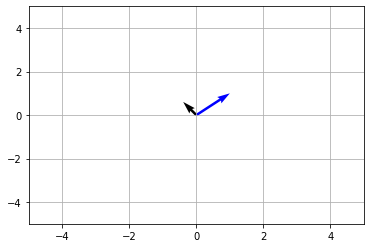

In [18]:
# 변환전 벡터
# quiver 함수 : 그래프에 화살표에 벡터를 표시
# quiver(원점, x좌표, y좌표, 색상, 각도, 단뒤)
plt.quiver(*origin, x1[0], x1[1])

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid(True)

plt.quiver(*origin, x2[0], x2[1], color='b', angles='xy', scale_units='xy', scale=1)

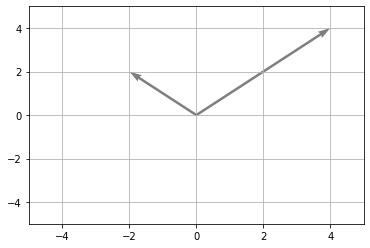

In [19]:
# 변환후 벡터

plt.quiver(*origin, x3[0], x3[1], color='k', angles='xy', scale_units='xy', alpha=0.5, scale=1)
plt.quiver(*origin, x4[0], x4[1], color='k', angles='xy', scale_units='xy',  alpha=0.5, scale=1)

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid(True)


In [20]:
## numpy 함수로 고유값, 고유벡터 알아내기
A = np.array([[3,1], [1,3]])
np.linalg.eig(A)

(array([4., 2.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

### 분산이 가장 큰 값이니까 고유값이 가장 큰 녀석이, 밑에 첫번째 나오는 요 녀석이라고 보시면 될 거 같아요. 0.7

In [21]:
## numpy 함수로 고유값, 고유벡터 알아내기2
np.set_printoptions( formatter={'flot_kind':'{:0.0f}'.format}, suppress=True) 

A = np.array([[3,1], [1,3]])
np.linalg.eig(A)

(array([4., 2.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [22]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                      --------------  ----- 
 0   AC	AE	AM	AO	AP	AR	AS	AU	BH	BM	CC	CF	CM	CN	CX	CY	DC	DG	ER	FM	FP	FR	GV	HI	HL	HP	HS	HR	KA	LA	LC	LH	LM	LO	LP	OR	PL	PP	PS	PT	QR	RA	RB	RC	SG	SM	SO	TF	TG	TO	TP	TR	VC	VK	plot	lime	species	hay	pH  89 non-null     object
dtypes: object(1)
memory usage: 840.0+ bytes


### 다시 pgfull로, 잔디 분석.

In [23]:
pg = pd.read_csv('pgfull.txt', sep='\t')
pg.head()

,AC,AE,AM,AO,AP,AR,AS,AU,BH,BM,...,TO,TP,TR,VC,VK,plot,lime,species,hay,pH
0,2.51,1.18,0.45,0.91,0.47,0.00,0.0,0.00,0.0,0.06,...,0.10,0.04,0.00,0.00,0.0,1.0,1,33,5.105,7.0
1,6.85,0.10,0.58,1.02,0.35,0.00,0.0,0.00,0.0,0.36,...,0.14,0.00,0.00,0.00,0.0,1.0,2,31,6.455,6.2
2,10.58,0.11,0.21,1.85,0.00,0.00,0.0,0.00,0.0,0.00,...,0.02,0.06,0.00,0.00,0.0,1.0,3,33,4.870,5.3
3,13.65,0.00,0.00,6.46,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,1.0,4,10,2.160,4.0
4,4.84,0.00,1.49,0.36,0.10,0.06,0.0,0.02,0.0,0.90,...,0.08,0.68,0.48,0.01,0.0,2.1,1,42,4.620,7.0


In [24]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AC       89 non-null     float64
 1   AE       89 non-null     float64
 2   AM       89 non-null     float64
 3   AO       89 non-null     float64
 4   AP       89 non-null     float64
 5   AR       89 non-null     float64
 6   AS       89 non-null     float64
 7   AU       89 non-null     float64
 8   BH       89 non-null     float64
 9   BM       89 non-null     float64
 10  CC       89 non-null     float64
 11  CF       89 non-null     float64
 12  CM       89 non-null     float64
 13  CN       89 non-null     float64
 14  CX       89 non-null     float64
 15  CY       89 non-null     float64
 16  DC       89 non-null     float64
 17  DG       89 non-null     float64
 18  ER       89 non-null     float64
 19  FM       89 non-null     float64
 20  FP       89 non-null     float64
 21  FR       89 non-nu

In [25]:
# 식물종 갯수 확인
pg.species.value_counts()

27    7
34    7
28    6
29    5
30    4
22    4
32    4
33    4
37    4
36    3
26    3
23    3
4     3
10    3
42    3
14    3
31    2
19    2
25    2
21    2
18    2
15    2
24    2
13    2
44    1
17    1
3     1
16    1
39    1
5     1
6     1
Name: species, dtype: int64

In [26]:
# 주성분분석 데이터 추출
data = pg.iloc[:, :54]
# data = StandardScaler().fit_transform(data)
# 표준화시킨후 주성분분석시 설명력이 떨어져서
# 여기서는 표준화 과정 생략함

In [27]:
# 주성분분석

pca = PCA()
pcaXY = pca.fit_transform(data)

np.set_printoptions(suppress=True, formatter={'float_kind':'{:.0f}'.format})
pca.explained_variance_ratio_
np.sum(pca.explained_variance_ratio_[:3]) # 74% 설명력 가짐

0.7448981110837314

In [28]:
trump = pd.read_csv('trump_en.txt', sep='\t')

In [32]:
# 파이썬을 통한 파일 읽기, 
docs = []
with open('trump_en.txt') as f:    
          docs = f.readlines() # 텍스트 파일을 라인단위로 읽어오는 명령어.
          
docs[:100]  # 100자 단위로 나눔.

['Assembly Speaker Chung, distinguished members of this Assembly, ladies and gentlemen: Thank you for the extraordinary privilege to speak in this great chamber and to address your people on behalf of the people of the United States of America.\n',
 '\n',
 'In our short time in your country, Melania and I have been awed by its ancient and modern wonders, and we are deeply moved by the warmth of your welcome.\n',
 '\n',
 'Last night, President and Mrs. Moon showed us incredible hospitality in a beautiful reception at the Blue House. We had productive discussions on increasing military cooperation and improving the trade relationship between our nations on the principle of fairness and reciprocity.\n',
 '\n',
 'Through this entire visit, it has been both our pleasure and our honor to create and celebrate a long friendship between the United States and the Republic of Korea.\n',
 '\n',
 'This alliance between our nations was forged in the crucible of war, and strengthened by the trials of

#### 여기서 단어를 하나 하나 씩 뽑아서 써야할 것 같다.
#### 문장/단어 토큰화

In [33]:
# 마스크를 이용한 워드클라우드
!pip install image
!pip install pillow

  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19494 sha256=b8e5603cb509e0b503ccafecf22a4e92ee4a6e5f781033a6840656adb664c173
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\ac\30\5c\a8b33888bea3507eda7c924a143d34b2390d2ca5b145b327b5
Successfully built image
